# Demostración: Regresión Multivariada en Python

Este notebook fue creado como apoyo para la asignatura **Formulación y Evaluación de Proyectos**.

Su objetivo es mostrar, de manera práctica, cómo aplicar una **regresión lineal multivariada** utilizando Python, con el fin de **predecir las ventas** de un producto a partir de varias variables que pueden influir en ellas.

---

## Contenido:
1. Introducción a la regresión multivariada  
2. Cargar y explorar el conjunto de datos  
3. Entrenamiento del modelo  
4. Evaluación e interpretación de resultados
5. Predicción y simulación de escenarios  


# 1. Introducción a la regresión multivariada

En el contexto de la **formulación y evaluación de proyectos**, es común que las decisiones se basen en datos:  
por ejemplo, estimar **las ventas de un producto** según el **precio**, la **inversión en publicidad** o la **época del año**.

La **regresión lineal** es una herramienta estadística que permite **modelar relaciones entre variables** y **predecir resultados**.

---

### 🔹 Regresión lineal simple

En la regresión lineal simple, se busca una relación entre una variable dependiente \( y \) y una sola variable independiente \( x \):

$$y = \beta_0 + \beta_1 x + \varepsilon$$

Por ejemplo:
> *Ventas* en función del *precio*.

---

### 🔹 Regresión lineal multivariada

En la práctica, muchos fenómenos dependen de **más de una variable**.  
La regresión multivariada extiende el modelo anterior para incluir varias variables independientes:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \varepsilon$$

Cada coeficiente \( \beta_i \) mide el **efecto de esa variable sobre \( y \)**, manteniendo las demás constantes.

Por ejemplo:

$$\text{Ventas} = \beta_0 + \beta_1 (\text{Precio}) + \beta_2 (\text{Publicidad}) + \beta_3 (\text{Temporada}) + \varepsilon$$

---

### ¿Para qué se usa?

- **Predecir resultados futuros** (por ejemplo, ventas esperadas).  
- **Medir el impacto de distintas variables** sobre un objetivo.  
- **Apoyar decisiones de negocio** mediante evidencia cuantitativa.  

---

En las siguientes secciones, veremos cómo crear un conjunto de datos simulado y aplicar este modelo paso a paso usando **Python**.


# 2. Cargar y explorar el conjunto de datos

Antes de entrenar un modelo (como un modelo de regresión en este caso), es fundamental **entender los datos** con los que vamos a trabajar.

En este ejemplo, contamos con un archivo llamado `ventas.csv` (generado previamente con un script en Python) que contiene información simulada (datos sintéticos) sobre las ventas de un producto.

Cada fila representa un registro con las siguientes columnas:

| Variable | Descripción |
|-----------|--------------|
| **precio** | Precio del producto (en dólares) |
| **publicidad** | Inversión en publicidad (en unidades monetarias) |
| **temporada** | 1 si es temporada alta, 0 si es baja |
| **ventas** | Ventas totales del producto |

```{note}
Hay que tener en cuenta que, para que el modelo funcione, las variables deben ser numéricas. Sin embargo, con el auge de Machine Learning se han presentado múltiples técnicas para hacer que variables cualitativas se vuelvan cuantitativas
```

Para cargar los datos en Python y manejarlos fácilmente, se usa una librería que se llama [`Pandas`](https://pandas.pydata.org/), una librería especializada para análisis de datos.

In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv("../data/ventas.csv")

# Mostrar las primeras filas
df.head()

,precio,publicidad,temporada,ventas
0,31.236204,256.572534,1,4475.710726
1,48.521429,1345.538740,1,6570.247643
2,41.959818,765.840766,0,4100.399744
3,37.959755,1115.427244,0,6295.414389
4,24.680559,1833.619653,1,11050.270921


Ahora vamos a usar varias funciones de `Pandas` para hacer una exploración inicial de los datos

In [2]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   precio      100 non-null    float64
 1   publicidad  100 non-null    float64
 2   temporada   100 non-null    int64  
 3   ventas      100 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 3.3 KB


In [3]:
# Resumen estadístico
df.describe().round(2)

,precio,publicidad,temporada,ventas
count,100.00,100.00,100.00,100.00
mean,34.11,1096.10,0.55,6936.50
std,8.92,527.60,0.50,2160.21
min,20.17,212.51,0.00,2099.64
25%,25.80,635.61,0.00,5218.68
50%,33.92,1110.12,1.00,6790.58
75%,41.91,1579.13,1.00,8579.08
max,49.61,1974.17,1.00,12836.96


Ahora vamos a graficar para observar tendencias y relaciones entre las variables, además de su distribución. Para esto usamos dos librerías que son [`Seaborn`](https://seaborn.pydata.org/) (que es muy especializada en visualización de datos estadísticos) y [`matplotlib`](https://matplotlib.org/) (más general para visualizaciones)

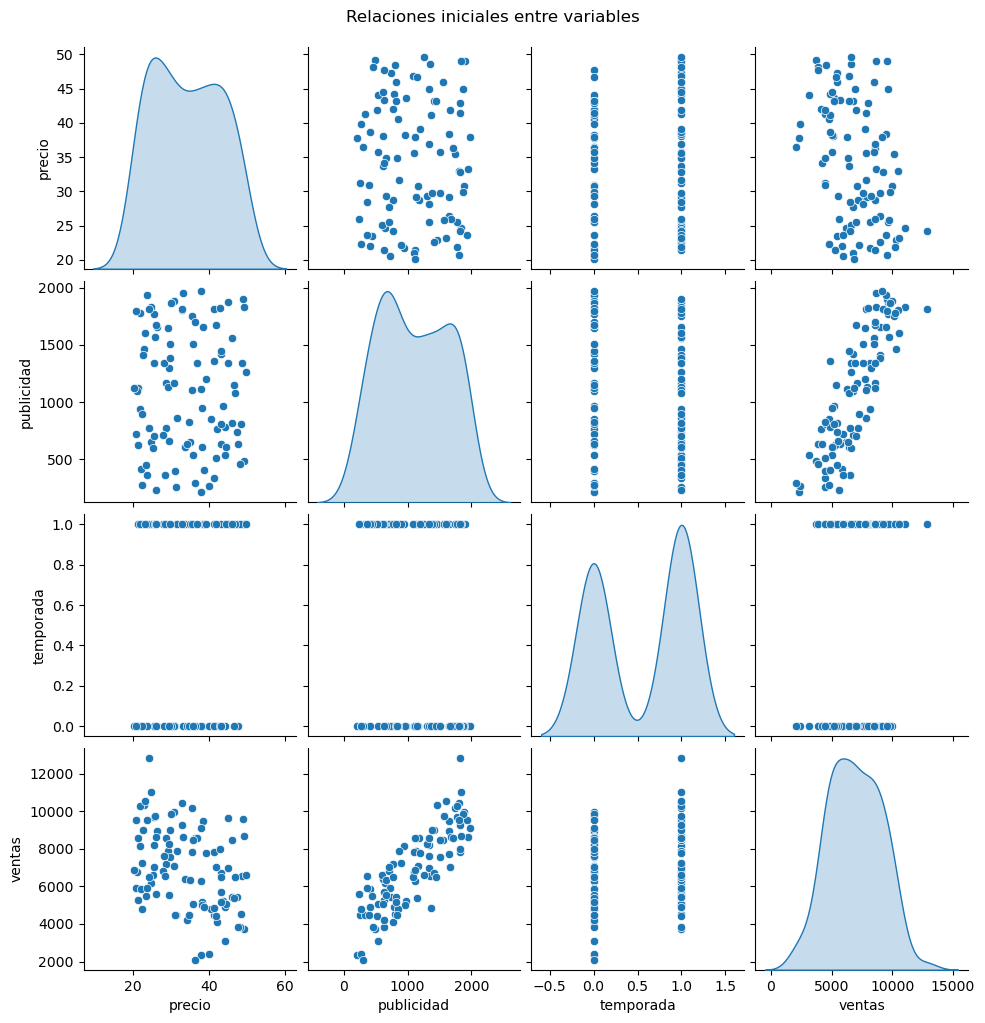

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, diag_kind="kde")
plt.suptitle("Relaciones iniciales entre variables", y=1.02)
plt.show()

A partir de este conjunto de datos observamos que:

- Las **ventas** tienden a aumentar cuando **la publicidad** crece.  
- El **precio** tiene un efecto negativo sobre las ventas (a mayor precio, menores ventas).  
- La variable **temporada** separa los datos en dos grupos visibles (alta y baja).  

En la siguiente sección aplicaremos el modelo de **regresión multivariada** para cuantificar estos efectos y obtener una ecuación que nos permita predecir las ventas.


# 3. Entrenamiento del modelo de regresión multivariada

Una vez que comprendemos las variables con las que estamos trabajando, el siguiente paso es **entrenar el modelo**.

En este caso, utilizaremos la clase `LinearRegression` de la librería `scikit-learn`, una de las más utilizadas en Python para machine learning.

---

### 🔹 ¿Qué significa "entrenar"?

Entrenar un modelo significa **encontrar los valores óptimos de los coeficientes** $\beta_0, \beta_1, \beta_2, \dots$ en la ecuación:

$$\text{Ventas} = \beta_0 + \beta_1 (\text{Precio}) + \beta_2 (\text{Publicidad}) + \beta_3 (\text{Temporada}) + \varepsilon$$

De esta forma, el modelo "aprende" cómo cada variable afecta a las ventas, buscando minimizar el error entre las **ventas reales** y las **ventas predichas**.

---

### 🔹 Paso a paso:

1. **Separar** las variables independientes (precio, publicidad, temporada) de la dependiente (ventas).  
2. **Crear** el modelo con `LinearRegression()`.  
3. **Entrenarlo** usando `.fit()`.  
4. **Examinar los coeficientes** obtenidos.


In [6]:
from sklearn.linear_model import LinearRegression

# 1. Definir variables independientes (X) y dependiente (y)
X = df[["precio", "publicidad", "temporada"]]
y = df["ventas"]

# 2. Crear el modelo
modelo = LinearRegression()

# 3. Entrenar (ajustar) el modelo
modelo.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:

# 4. Extraer coeficientes e intercepto
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": modelo.coef_
})

intercepto = modelo.intercept_

# Mostrar resultados
display(coeficientes)
print(f"Intercepto (β₀): {intercepto:.2f}")


,Variable,Coeficiente
0,precio,-89.682658
1,publicidad,3.579734
2,temporada,1415.061601


Intercepto (β₀): 5293.15


### Interpretación de los coeficientes

Cada coeficiente $( \beta_i)$ representa el **efecto promedio** que tiene esa variable sobre las ventas, *manteniendo las demás constantes*.

Por ejemplo:

- Si el coeficiente del **precio** es negativo, significa que al aumentar el precio, las ventas tienden a disminuir.  
- Si el coeficiente de **publicidad** es positivo, implica que una mayor inversión en publicidad incrementa las ventas.  
- Si el coeficiente de **temporada** es positivo, muestra que en temporada alta se venden más unidades, incluso si el precio y la publicidad se mantienen iguales.

El **intercepto** \( \beta_0 \) indica el valor promedio esperado de las ventas cuando todas las variables son 0 (sirve como punto de referencia, no necesariamente tiene sentido práctico directo).

---

En resumen, el modelo ha "aprendido" la ecuación que mejor relaciona las variables con las ventas observadas.

La siguiente celda solo es para mostrar la ecuación que resultó del modelo

In [9]:
# Mostrar la ecuación estimada del modelo
ecuacion = f"Ventas = {intercepto:.2f}"
for var, coef in zip(X.columns, modelo.coef_):
    signo = "+" if coef >= 0 else "-"
    ecuacion += f" {signo} {abs(coef):.2f}*{var}"
    
print("Ecuación estimada del modelo:")
print(ecuacion)


Ecuación estimada del modelo:
Ventas = 5293.15 - 89.68*precio + 3.58*publicidad + 1415.06*temporada


En esta etapa, el modelo ya está entrenado y conocemos los coeficientes que explican cómo cada variable incide en las ventas.

En la siguiente sección, evaluaremos qué tan bien se ajusta este modelo a los datos observados y qué tan confiables son sus predicciones.


# 4. Evaluación del modelo y análisis de resultados

Una vez que el modelo de regresión ha sido entrenado, debemos preguntarnos:

> ¿Qué tan bien explica el modelo los datos reales?

Para responderlo, usaremos **métricas de desempeño** y **gráficas de comparación** entre los valores reales y los predichos.

---

### 🔹 Principales métricas:

- **R² (Coeficiente de determinación):** mide qué porcentaje de la variabilidad de las ventas es explicada por el modelo.  
  - Un valor cercano a 1 indica un buen ajuste.
  - Un valor cercano a 0 indica que el modelo no explica bien los datos.

- **MAE (Error Absoluto Medio):** promedio de los errores absolutos entre predicciones y valores reales.

- **RMSE (Raíz del Error Cuadrático Medio):** penaliza más los errores grandes.  
  - Cuanto más bajo, mejor.

Estas métricas nos permiten evaluar si el modelo es útil para tomar decisiones. Están implementadas también en la librería `scikit learn`


In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predicciones del modelo
y_pred = modelo.predict(X)

# Calcular métricas
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Mostrar resultados
print("📈 Resultados del modelo:")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


📈 Resultados del modelo:
R²: 0.938
MAE: 429.21
RMSE: 537.13


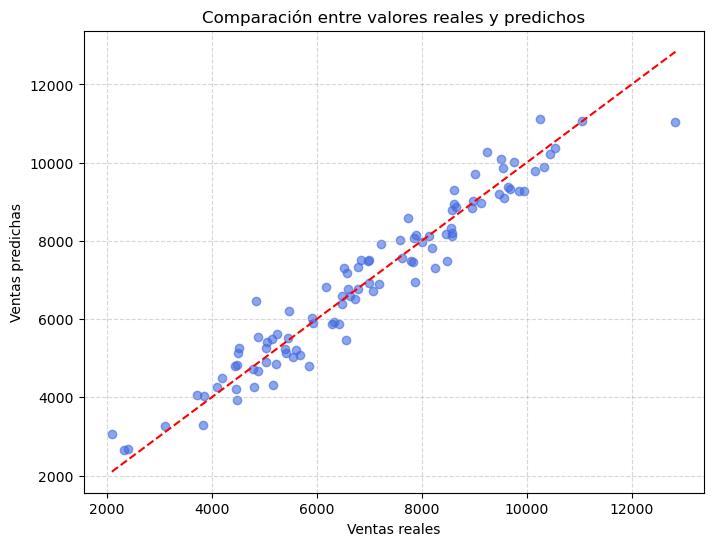

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, color='royalblue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Comparación entre valores reales y predichos")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Si los puntos se acercan a la línea roja (que representa el ajuste perfecto), el modelo está funcionando bien.

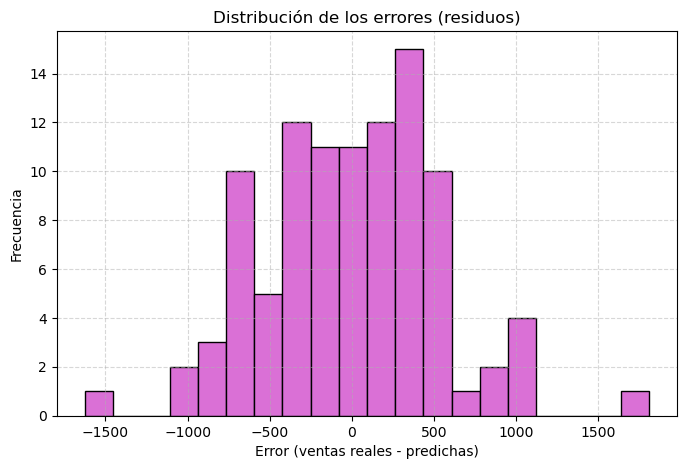

In [13]:
residuos = y - y_pred

plt.figure(figsize=(8,5))
plt.hist(residuos, bins=20, color='orchid', edgecolor='black')
plt.title("Distribución de los errores (residuos)")
plt.xlabel("Error (ventas reales - predichas)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Si los errores están distribuidos de forma simétrica alrededor de 0,
significa que el modelo no tiene sesgo sistemático (no sobreestima ni subestima consistentemente).

### Interpretación de resultados

- **R² alto (≥ 0.8):** el modelo explica gran parte de la variación de las ventas.  
- **Errores bajos (MAE, RMSE):** las predicciones son cercanas a los valores reales.  
- **Gráfico de dispersión:** los puntos deben alinearse lo más posible con la línea diagonal.  
- **Histograma de residuos:** debe tener forma aproximadamente simétrica alrededor de cero.

En conjunto, estos indicadores nos permiten concluir si la regresión multivariada es un modelo adecuado para predecir las ventas con base en las variables elegidas.


Con esta evaluación, podemos determinar si nuestro modelo es útil o si necesitamos ajustar las variables,
añadir más información, o probar técnicas más avanzadas.

En la siguiente sección veremos cómo utilizar este modelo para **hacer predicciones sobre nuevos escenarios**,
como estimar las ventas esperadas bajo distintas estrategias de precio o publicidad.


# 5. Predicción y simulación de escenarios

Una de las mayores ventajas de un modelo de regresión es que nos permite **hacer predicciones**.

Podemos estimar las ventas esperadas bajo distintas condiciones, como por ejemplo:

- Cambiar el precio del producto  
- Aumentar el presupuesto de publicidad  
- Simular una temporada alta o baja

Esto se conoce como **análisis de escenarios**, y ayuda a responder preguntas como:

> “¿Qué pasaría con las ventas si invierto un 20% más en publicidad?”  
> “¿Qué efecto tendría reducir el precio en un 10%?”


In [14]:
# Crear un nuevo conjunto de condiciones (escenarios)
nuevos_escenarios = pd.DataFrame({
    "precio": [50, 45, 55],
    "publicidad": [5000, 6000, 4000],
    "temporada": [1, 0, 1]
})

# Generar las predicciones de ventas
predicciones = modelo.predict(nuevos_escenarios)

# Mostrar resultados
resultados = nuevos_escenarios.copy()
resultados["ventas_estimadas"] = predicciones
display(resultados)


,precio,publicidad,temporada,ventas_estimadas
0,50,5000,1,20122.742984
1,45,6000,0,22735.828311
2,55,4000,1,16094.596055


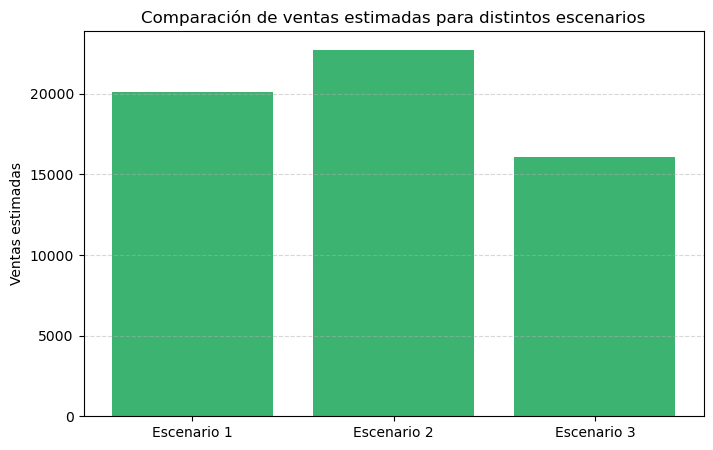

In [15]:
plt.figure(figsize=(8,5))
plt.bar(resultados.index, resultados["ventas_estimadas"], color='mediumseagreen')
plt.xticks(resultados.index, ["Escenario 1", "Escenario 2", "Escenario 3"])
plt.ylabel("Ventas estimadas")
plt.title("Comparación de ventas estimadas para distintos escenarios")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [16]:
# # Ejecutar solo en colab
# from ipywidgets import interact

# def simular_ventas(precio=50, publicidad=5000, temporada=1):
#     entrada = pd.DataFrame({
#         "precio": [precio],
#         "publicidad": [publicidad],
#         "temporada": [temporada]
#     })
#     pred = modelo.predict(entrada)[0]
#     print(f"🔹 Ventas estimadas: {pred:.2f}")

# interact(simular_ventas, precio=(30,70,1), publicidad=(1000,10000,500), temporada=(0,1,1))


### Interpretación

- Un **precio más bajo** suele incrementar las ventas (coeficiente negativo en el modelo).  
- Mayor **inversión en publicidad** tiende a aumentar las ventas (coeficiente positivo).  
- Si la variable de **temporada** es 1 (alta), las ventas también crecen.
